## Offline analysis of Montecarlo simulations

Reading data from data/magnetization/magnetization_N2500_T2.30_H0.00_t100000_th1.txt
Number of samples: 100000
-0.121047368 0.20121540609164498


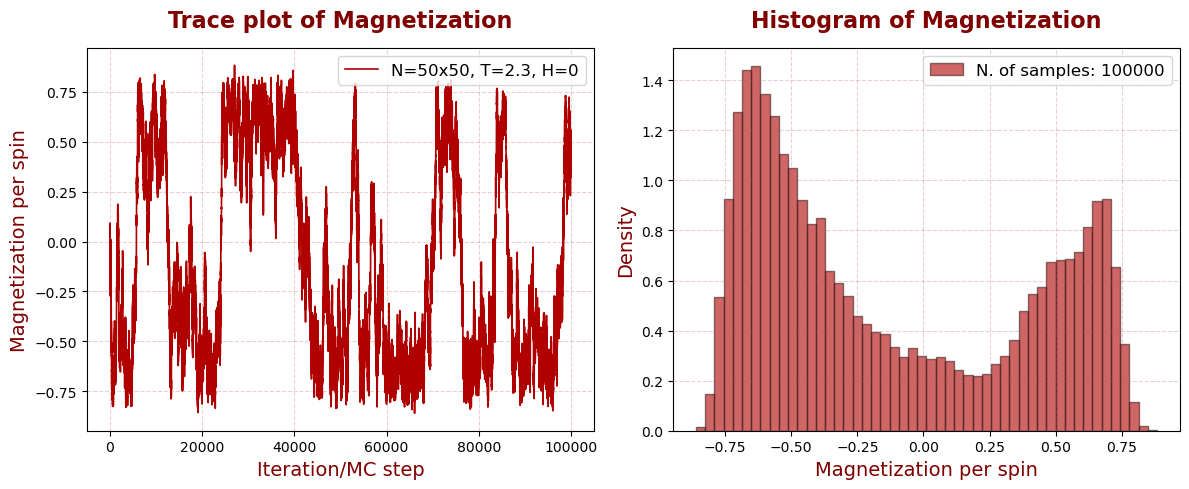

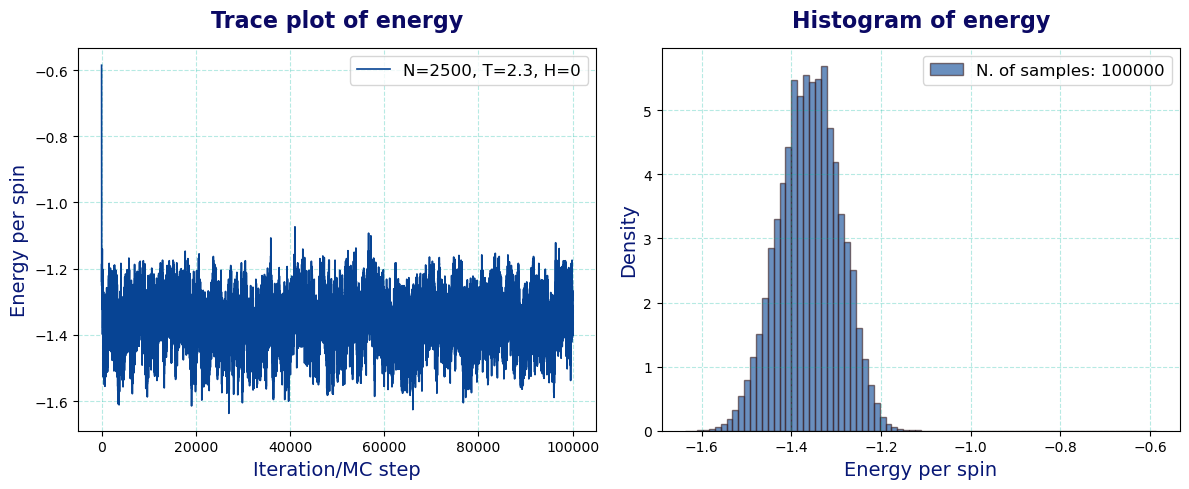

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50*50
T = 2.3
H = 0
t = 100000
th = 1
BURNIN = 0

file_name_en = f"data/energy/energy_N{N}_T{T:.2f}_H{H:.2f}_t{t}_th{th}.txt"
file_name_mag = f"data/magnetization/magnetization_N{N}_T{T:.2f}_H{H:.2f}_t{t}_th{th}.txt"
print(f"Reading data from {file_name_mag}")
data = np.loadtxt(file_name_mag)
data_en = np.loadtxt(file_name_en) 
print("Number of samples:", len(data))
# Display the trace plot and the histogram on the left
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# in the sample plot, plot the magnetization trace
plt.plot(data, color='#B00000', linewidth=1.2, label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}, T={T}, H={H}")
plt.title("Trace plot of Magnetization", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("Iteration/MC step", fontsize=14, color='#800000')
plt.ylabel("Magnetization per spin", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)


plt.subplot(1, 2, 2)
plt.hist((data[BURNIN:]), bins=50, density=True, alpha=0.6, color='#B00000', edgecolor='#3B1C1C', label = f"N. of samples: {len(data)}")
plt.title("Histogram of Magnetization", fontsize=16, weight='bold', color='#800000', pad=15)
plt.xlabel("Magnetization per spin", fontsize=14, color='#800000')
plt.ylabel("Density", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)
print(np.mean((data[BURNIN:])), np.std(np.abs(data[BURNIN:])))
#plt.savefig(f"../NumericalMethods/magnetization_N{N}_T{T:.2f}_H{H:.2f}_t{t}_th{th}.pdf", dpi=300)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# in the sample plot, plot the magnetization trace
plt.plot(data_en, color="#074494", linewidth=1.2, label=f"N={N}, T={T}, H={H}")
plt.title("Trace plot of energy", fontsize=16, weight='bold', color='#0B0964', pad=15)
plt.xlabel("Iteration/MC step", fontsize=14, color="#071775")
plt.ylabel("Energy per spin", fontsize=14, color='#071775')
plt.grid(linestyle='--', alpha=0.3, color="#0DBBA4")
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(data_en, bins=80, density=True, alpha=0.6, color='#074494', edgecolor='#3B1C1C', label = f"N. of samples: {len(data)}")
plt.title("Histogram of energy", fontsize=16, weight='bold', color="#0B0964", pad=15)
plt.xlabel("Energy per spin", fontsize=14, color='#071775')
plt.ylabel("Density", fontsize=14, color='#071775')
plt.grid(linestyle='--', alpha=0.3, color='#0DBBA4')
plt.legend(fontsize=12)
#plt.savefig(f"../NumericalMethods/energy_N{N}_T{T:.2f}_H{H:.2f}_t{t}_th{th}.pdf", dpi=300)
plt.tight_layout()
plt.show()

----

Now let us sweep through the chains and compute statistical averages:

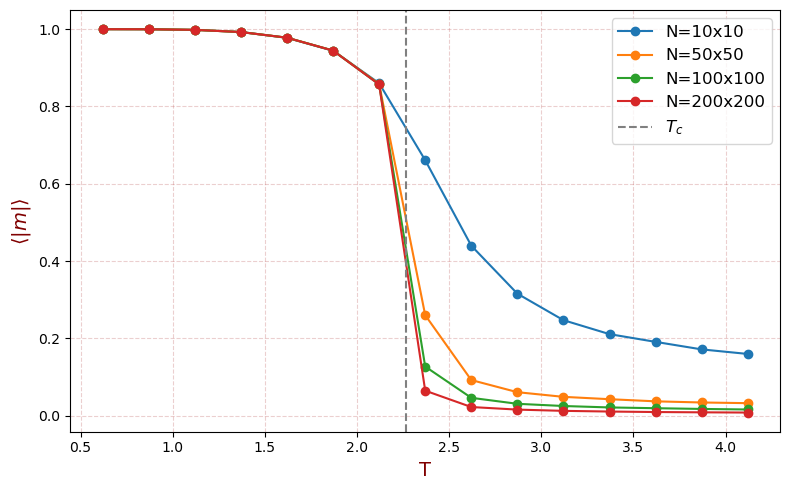

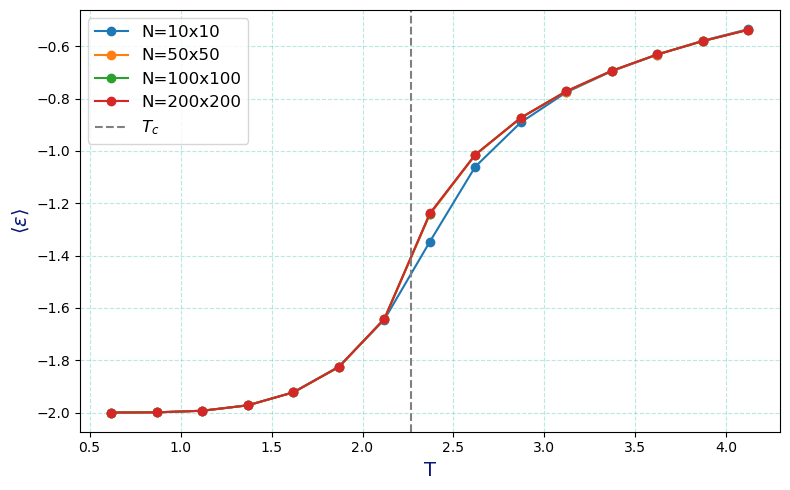

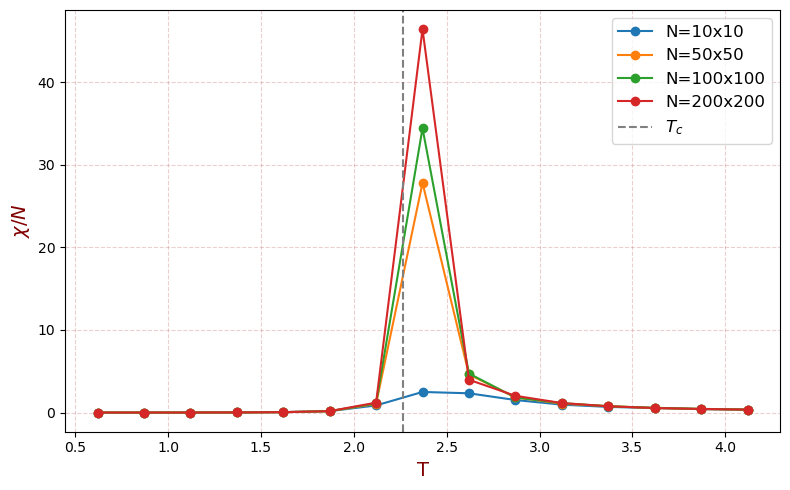

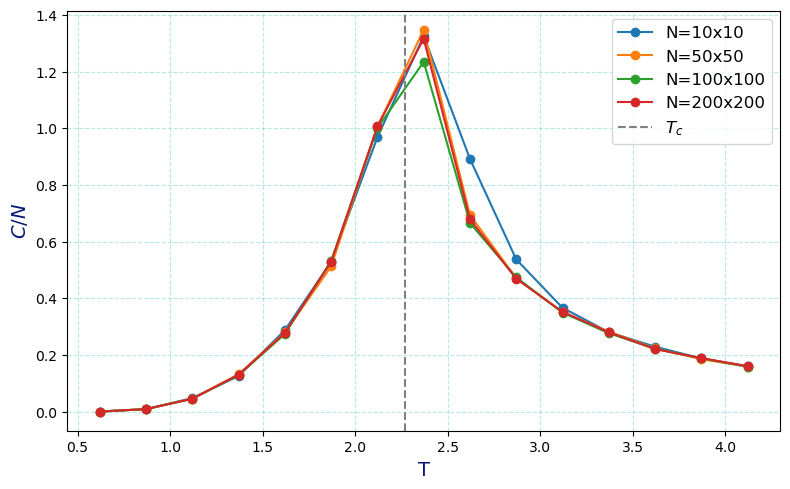

In [5]:
Temperatures = [0.62, 0.87, 1.12, 1.37, 1.62, 1.87, 2.12, 2.37, 2.62, 2.87, 3.12, 3.37, 3.62, 3.87, 4.12]
Sizes = [10*10, 50*50, 100*100, 200*200]

H = 0
t = 30_000
th = 1
BURNIN = t // 50

##### MAGNETIZATION
magnetizations = np.zeros((len(Sizes), len(Temperatures)))
energies = np.zeros((len(Sizes), len(Temperatures)))
variances_mag = np.zeros((len(Sizes), len(Temperatures)))
variances_en = np.zeros((len(Sizes), len(Temperatures)))
variances_mag_noT = np.zeros((len(Sizes), len(Temperatures)))
variances_en_noT = np.zeros((len(Sizes), len(Temperatures)))

for T in Temperatures:
    for N in Sizes:

        file_name_mag = f"data/magnetization/magnetization_N{N}_T{T:.3f}_H{H:.2f}_t{t}_th{th}.txt"
        file_name_en = f"data/energy/energy_N{N}_T{T:.3f}_H{H:.2f}_t{t}_th{th}.txt"

        data = np.loadtxt(file_name_mag)
        data_en = np.loadtxt(file_name_en) 

        average_mag = np.mean(np.abs(data[BURNIN:])) 
        average_en = np.mean(data_en[BURNIN:])
        energies[Sizes.index(N), Temperatures.index(T)] = average_en
        magnetizations[Sizes.index(N), Temperatures.index(T)] = average_mag

        variances_mag[Sizes.index(N), Temperatures.index(T)] = N*np.var((np.abs(data[BURNIN:])))/T
        variances_en[Sizes.index(N), Temperatures.index(T)] = N*np.var(data_en[BURNIN:])/T**2
        variances_mag_noT[Sizes.index(N), Temperatures.index(T)] = np.var((np.abs(data[BURNIN:])))
        variances_en_noT[Sizes.index(N), Temperatures.index(T)] = np.var(data_en[BURNIN:])

# Plot the magnetizazion, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    #plot errorbar
    plt.plot(Temperatures, magnetizations[i, :], marker='o', linestyle='-', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
plt.axvline(x=2.267, label = "$T_c$", linestyle='--', color='gray')
plt.ylabel(r"$\langle|m|\rangle$", fontsize=14, color='#800000')
plt.xlabel("T", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/magnetization_vs_T_broad.pdf", dpi=300)
plt.show()  

# Plot the energy, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    #plt.errorbar(Temperatures, energies[i, :], yerr=np.sqrt(variances_en[i, :]/N), marker='o', linestyle='-', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
    plt.plot(Temperatures, energies[i, :], marker='o', linestyle='-', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
plt.ylabel(r"$\langle\epsilon\rangle$", fontsize=14, color='#071775')
plt.xlabel("T", fontsize=14, color='#071775')
plt.axvline(x=2.267, label = "$T_c$", linestyle='--', color='gray')
plt.grid(linestyle='--', alpha=0.3, color='#0DBBA4')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/energy_vs_T_broad.pdf", dpi=300)
plt.show()  

# Plot the variance of magnetization, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    plt.plot(Temperatures, variances_mag[i, :], marker='o', linestyle='-', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
plt.ylabel(r"$\chi / N$", fontsize=14, color='#800000')
plt.xlabel("T", fontsize=14, color='#800000')
plt.axvline(x=2.267, label = "$T_c$", linestyle='--', color='gray')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/magnetic_susceptibility_vs_T_broad.pdf", dpi=300)
plt.show()

# Plot the variance of energy, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    plt.plot(Temperatures, variances_en[i, :], marker='o', linestyle='-', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")      
plt.ylabel(r"$C / N$", fontsize=14, color='#071775')
plt.xlabel("T", fontsize=14, color='#071775')
plt.axvline(x=2.267, label = "$T_c$", linestyle='--', color='gray')
plt.grid(linestyle='--', alpha=0.3, color='#0DBBA4')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/specific_heat_vs_T_broad.pdf", dpi=300)
plt.show()

Focusing on the critical region,

<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:94: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:94: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7089/914251751.py:73: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(T_ref, chi_ref, color='black', linestyle='--', label='Scaling behavior $\sim|t|^{-7/4}$')
/tmp/ipykernel_7089/914251751.py:94: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(T_ref, chi_ref, color='black', linestyle='--', label='Scaling behavior $\sim ln(1/t)$')
/tmp/ipykernel_7089/914251751.py:45: RuntimeWarning: invalid value encountered in power
  m_ref = (1 - (1/np.sinh(2/T_ref))**4)**0.125


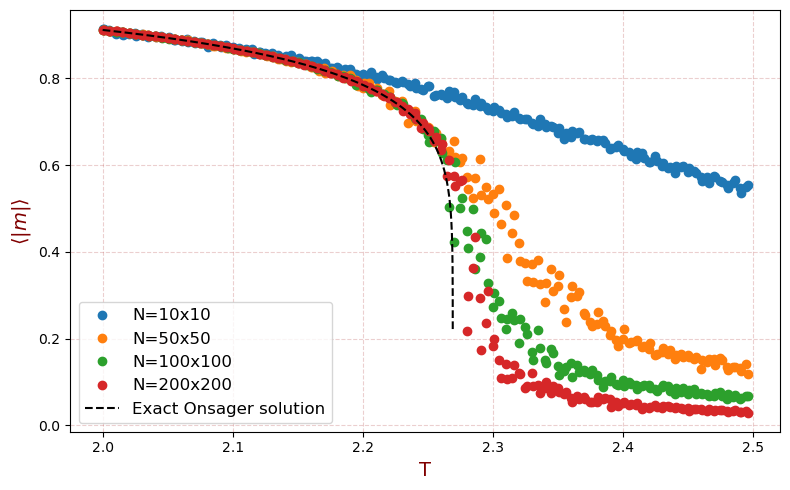

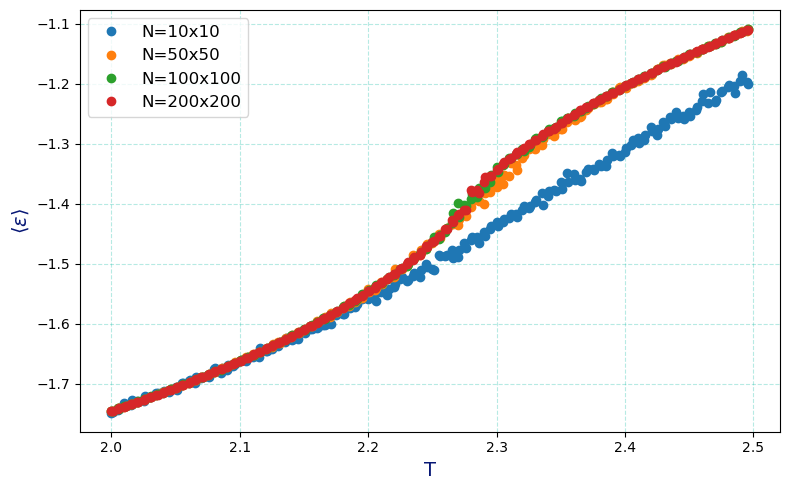

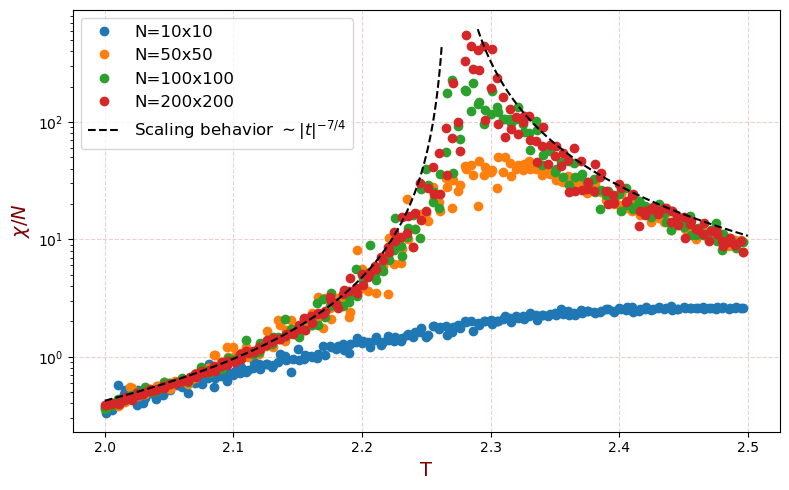

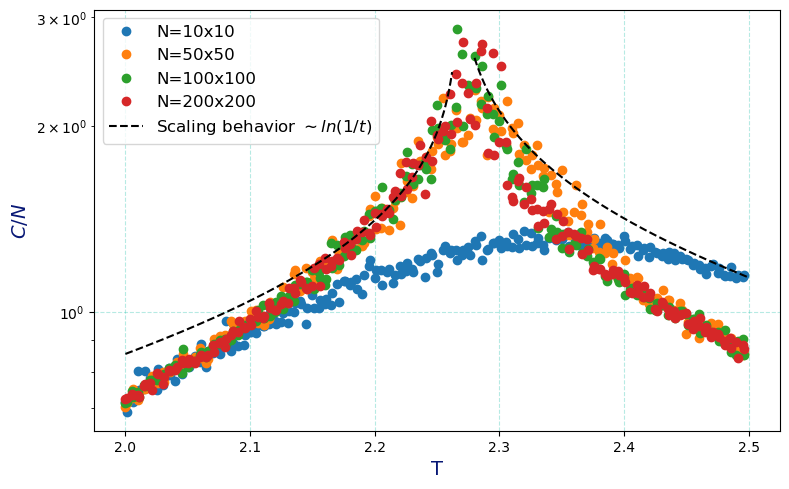

In [6]:
# FOCUS ON THE CRITICAL REGION
Temperatures = np.arange(2.0, 2.5, 0.005).tolist() 
Temperatures = Temperatures + np.arange(2.001, 2.5, 0.005).tolist()

# merge the two lists removing duplicates
t = 30_000
th = 1
H = 0
Sizes = [10*10, 50*50, 100*100, 200*200]
BURNIN = t // 50

#Extract data
magnetizations = np.zeros((len(Sizes), len(Temperatures)))
energies = np.zeros((len(Sizes), len(Temperatures)))
variances_mag = np.zeros((len(Sizes), len(Temperatures)))
variances_en = np.zeros((len(Sizes), len(Temperatures)))

for T in Temperatures:
    for N in Sizes:

        file_name_mag = f"data/magnetization/magnetization_N{N}_T{T:.3f}_H{H:.2f}_t{t}_th{th}.txt"
        file_name_en = f"data/energy/energy_N{N}_T{T:.3f}_H{H:.2f}_t{t}_th{th}.txt"

        data = np.loadtxt(file_name_mag)
        data_en = np.loadtxt(file_name_en) 

        average_mag = np.mean(np.abs(data[BURNIN:]))  # discard first 250 samples as burn-in
        average_en = np.mean(data_en[BURNIN:])
        energies[Sizes.index(N), Temperatures.index(T)] = average_en
        magnetizations[Sizes.index(N), Temperatures.index(T)] = average_mag

        variances_mag[Sizes.index(N), Temperatures.index(T)] = N*np.var((np.abs(data[BURNIN:])))/T
        variances_en[Sizes.index(N), Temperatures.index(T)] = N*np.var(data_en[BURNIN:])/T**2

# Plot the magnetizazion, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    #plt.errorbar(Temperatures, magnetizations[i, :], yerr=np.sqrt(variances_mag[i, :]/N), marker='o', linestyle='', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
    plt.plot(Temperatures, magnetizations[i, :], marker='o', linestyle='', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
plt.ylabel(r"$\langle|m|\rangle$", fontsize=14, color='#800000')
plt.xlabel("T", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
# reference plot of m = (1 - sinh(2/T)^-4)^0.125
T_ref = np.linspace(2, 2.5, 100000)
m_ref = (1 - (1/np.sinh(2/T_ref))**4)**0.125
plt.plot(T_ref, m_ref, color='black', linestyle='--', label='Exact Onsager solution')
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()
#plt.savefig("../NumericalMethods/magnetization_vs_T_narrow.pdf", dpi=300)
plt.show()  
# Plot the energy, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    plt.plot(Temperatures, energies[i, :], marker='o', linestyle='', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")

plt.ylabel(r"$\langle\epsilon\rangle$", fontsize=14, color='#071775')
plt.xlabel("T", fontsize=14, color='#071775')
plt.grid(linestyle='--', alpha=0.3, color='#0DBBA4')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/energy_vs_T_narrow.pdf", dpi=300)
plt.show()  
# Plot the variance of magnetization, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    plt.plot(Temperatures, variances_mag[i, :], marker='o', linestyle='', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")
plt.ylabel(r"$\chi / N$", fontsize=14, color='#800000')
plt.xlabel("T", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.yscale('log')
T_ref = np.linspace(2, 2.262, 100000)
chi_ref = np.abs((T_ref-2.267)/(2.267))**(-7/4) / 100
plt.plot(T_ref, chi_ref, color='black', linestyle='--', label=r'Scaling behavior $\sim|t|^{-7/4}$')
T_ref = np.linspace(2.29, 2.5, 100000)
chi_ref = np.abs((T_ref-2.267)/(2.267))**(-7/4) / 5
plt.plot(T_ref, chi_ref, color='black', linestyle='--')
plt.yscale('log')

plt.legend(fontsize=12, loc = "upper left")
plt.tight_layout()
#plt.savefig("../NumericalMethods/magnetic_susceptibility_vs_T_narrow.pdf", dpi=300)
plt.show()  
# Plot the variance of energy, superpose different sizes
plt.figure(figsize=(8, 5))
for i, N in enumerate(Sizes):
    plt.plot(Temperatures, variances_en[i, :], marker='o', linestyle='', label=f"N={np.sqrt(N):.0f}x{np.sqrt(N):.0f}")      
plt.ylabel(r"$C / N$", fontsize=14, color='#071775')
plt.xlabel("T", fontsize=14, color='#071775')
plt.grid(linestyle='--', alpha=0.3, color='#0DBBA4')
plt.yscale('log')

T_ref = np.linspace(2, 2.262, 100000)
chi_ref = -np.log(np.abs(1-(T_ref)/(2.267))) / 2.5
plt.plot(T_ref, chi_ref, color='black', linestyle='--', label='Scaling behavior $\sim ln(1/t)$')
T_ref = np.linspace(2.28, 2.5, 100000)
chi_ref = -np.log(np.abs(1-(T_ref)/(2.267))) / 2
plt.plot(T_ref, chi_ref, color='black', linestyle='--')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/specific_heat_vs_T_narrow.pdf", dpi=300)
plt.show()

## Autocorrelation functions

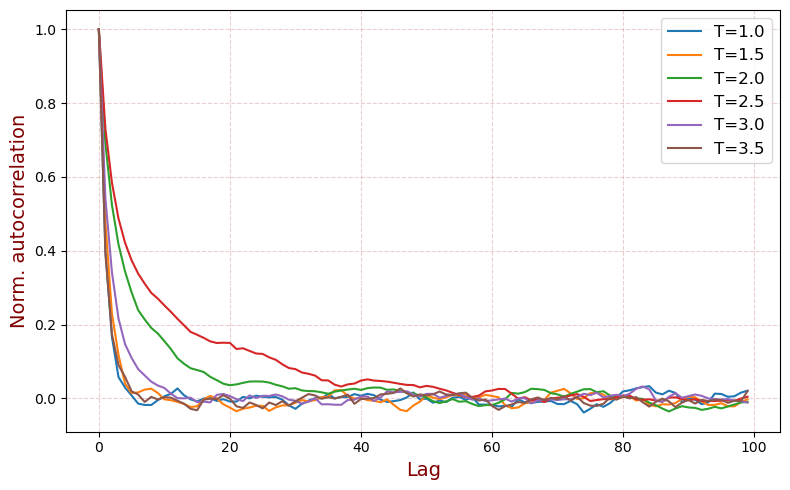

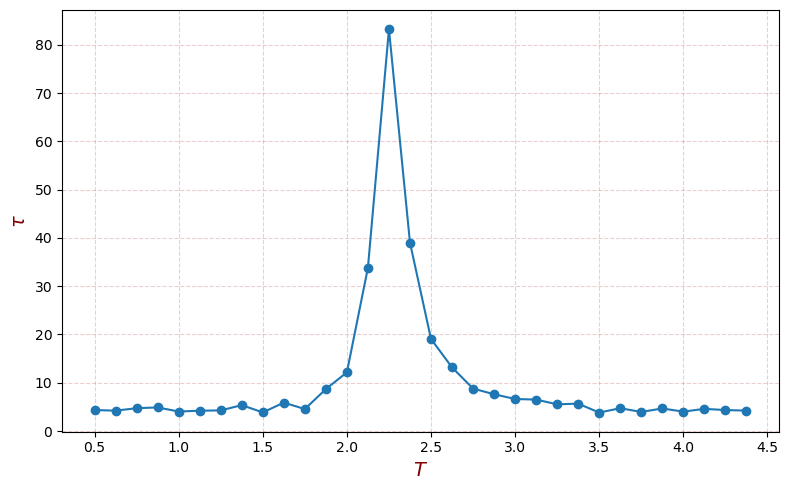

In [7]:
t = 10_000
th = 1
H = 0
Size = 100*100
BURNIN = t // 10

def acf(data, lag):
    n = len(data)
    data_mean = np.mean(data)
    c0 = np.sum((data - data_mean) ** 2) / n
    if c0 == 0:
        return 0
    c_lag = np.sum((data[:n - lag] - data_mean) * (data[lag:] - data_mean)) / (n - lag)
    return c_lag / c0

Temperatures = np.arange(0.5, 4.5, 0.125).tolist()
chosenTemp = [1, 1.5, 2, 2.5, 3, 3.5]

plt.figure(figsize=(8, 5))
tau = []
for T in Temperatures:
    file_name_mag = f"data/energy/energy_N{Size}_T{T:.3f}_H{H:.2f}_t{t}_th{th}.txt"
    data = np.loadtxt(file_name_mag)
    acf_values = [acf(data[BURNIN:], lag) for lag in range(100)]
    # Compute the first value negative of the autocorrelation function
    #tau.append(np.where(np.array(acf_values) < 0)[0][0])
    tau.append(1 + 2*np.sum(acf_values))
    if (T in chosenTemp):
        plt.plot(acf_values, label=f"T={T}")
plt.xlabel("Lag", fontsize=14, color='#800000')
plt.ylabel("Norm. autocorrelation", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("../NumericalMethods/autocorrelation_function_energy.pdf", dpi=300)
plt.show()

plt.figure(figsize=(8, 5))
#plot tau_int as a function of T
plt.plot(Temperatures, tau, marker='o', linestyle='-')
plt.xlabel("$T$", fontsize=14, color='#800000')
plt.ylabel(r"$\tau$", fontsize=14, color='#800000')
plt.grid(linestyle='--', alpha=0.3, color='#C06060')
plt.tight_layout()
#plt.savefig("../NumericalMethods/integrated_autocorrelation_time_energy.pdf", dpi=300)
plt.show()